In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
plt.style.use("ggplot")
sns.set(rc={'figure.figsize':(10,6)})

# Load your dataset
df = pd.read_csv("clean_merged_movie_data.csv")

df.head()


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5.0,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1.0,10.0,48067
1,1,661,3.0,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1.0,10.0,48067
2,1,914,3.0,978301968,My Fair Lady (1964),Musical|Romance,F,1.0,10.0,48067
3,1,3408,4.0,978300275,Erin Brockovich (2000),Drama,F,1.0,10.0,48067
4,1,2355,5.0,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1.0,10.0,48067


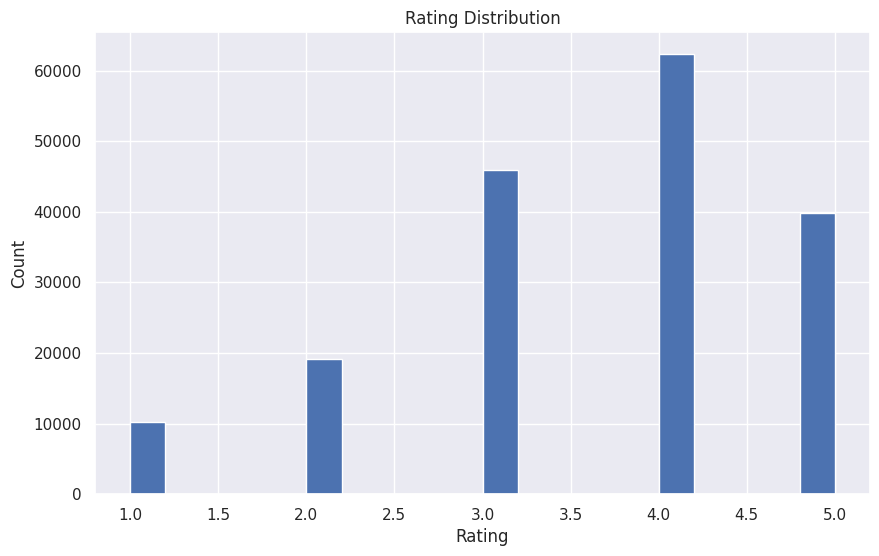

In [2]:
plt.figure(figsize=(10,6))
plt.hist(df['Rating'], bins=20)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


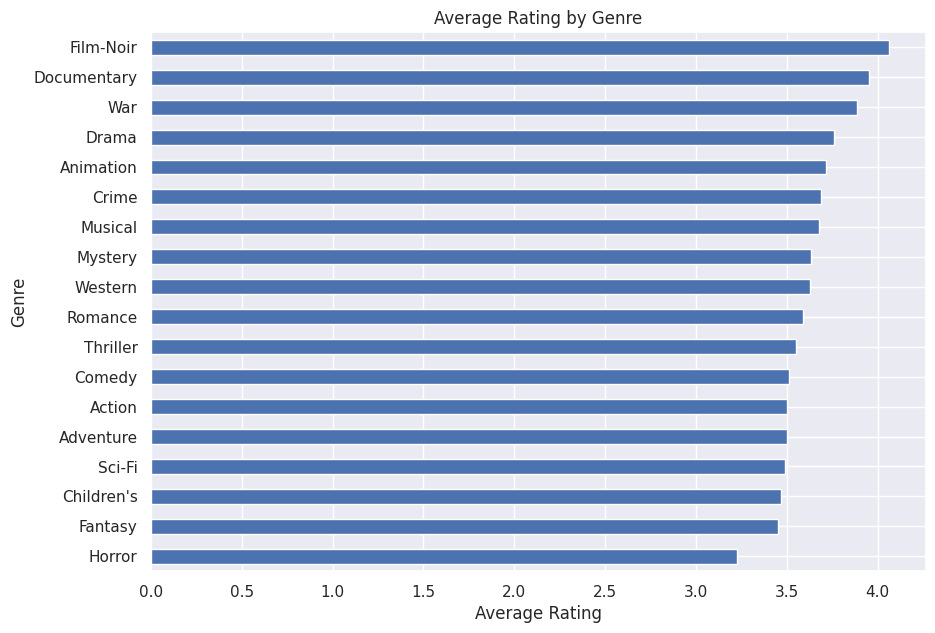

In [3]:
# explode genres first
genres = df.assign(Genres=df["Genres"].str.split("|")).explode("Genres")

avg_genre = genres.groupby("Genres")["Rating"].mean().sort_values()

avg_genre.plot(kind="barh", figsize=(10,7))
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


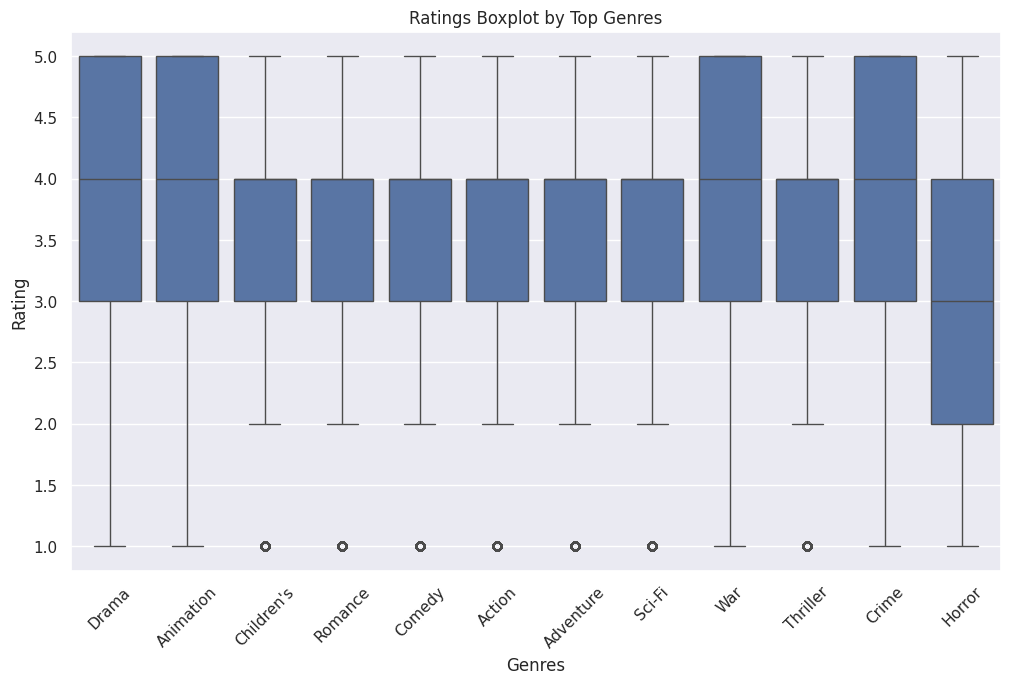

In [4]:
top_genres = genres["Genres"].value_counts().head(12).index
subset = genres[genres["Genres"].isin(top_genres)]

plt.figure(figsize=(12,7))
sns.boxplot(data=subset, x="Genres", y="Rating")
plt.xticks(rotation=45)
plt.title("Ratings Boxplot by Top Genres")
plt.show()


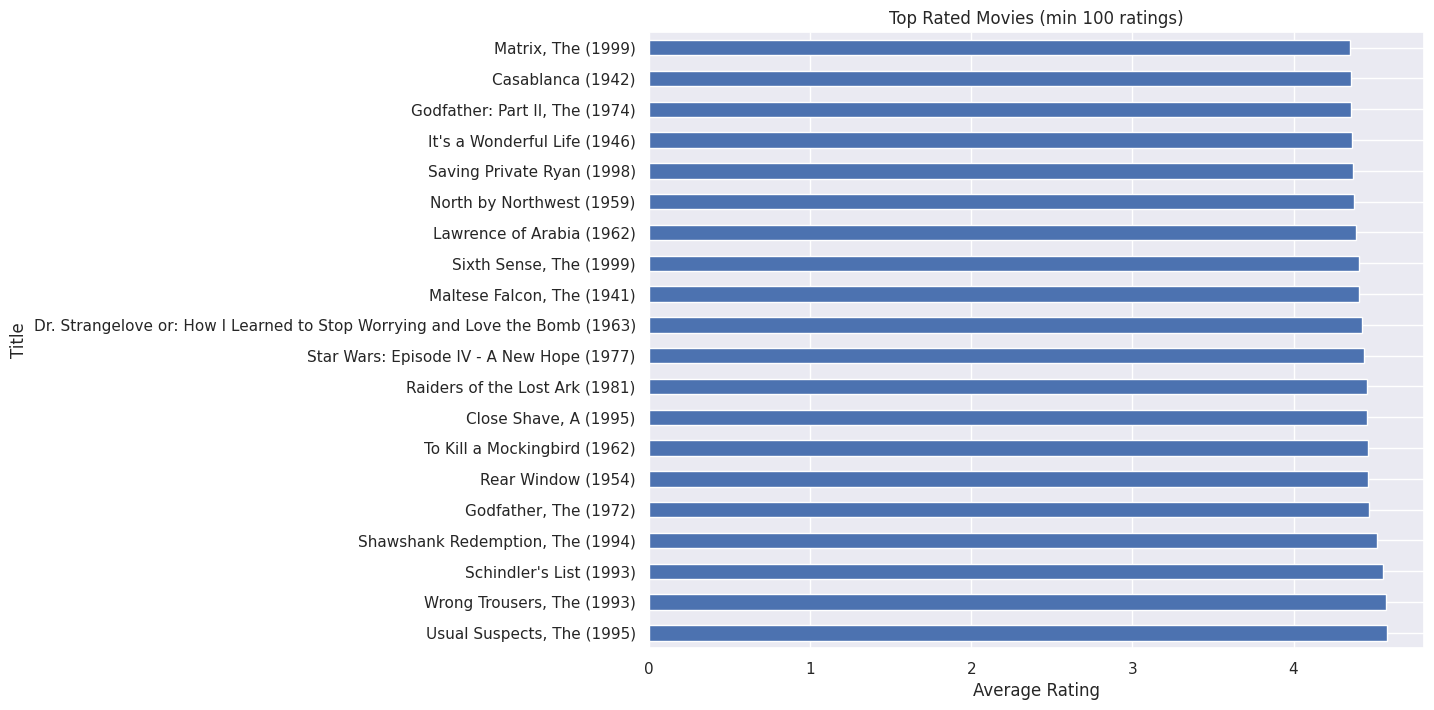

In [5]:
movie_stats = df.groupby("Title").agg(
    avg_rating=("Rating", "mean"),
    count=("Rating", "count")
).query("count >= 100")

top_movies = movie_stats.sort_values("avg_rating", ascending=False).head(20)
top_movies["avg_rating"].plot(kind="barh", figsize=(10,8))
plt.title("Top Rated Movies (min 100 ratings)")
plt.xlabel("Average Rating")
plt.show()


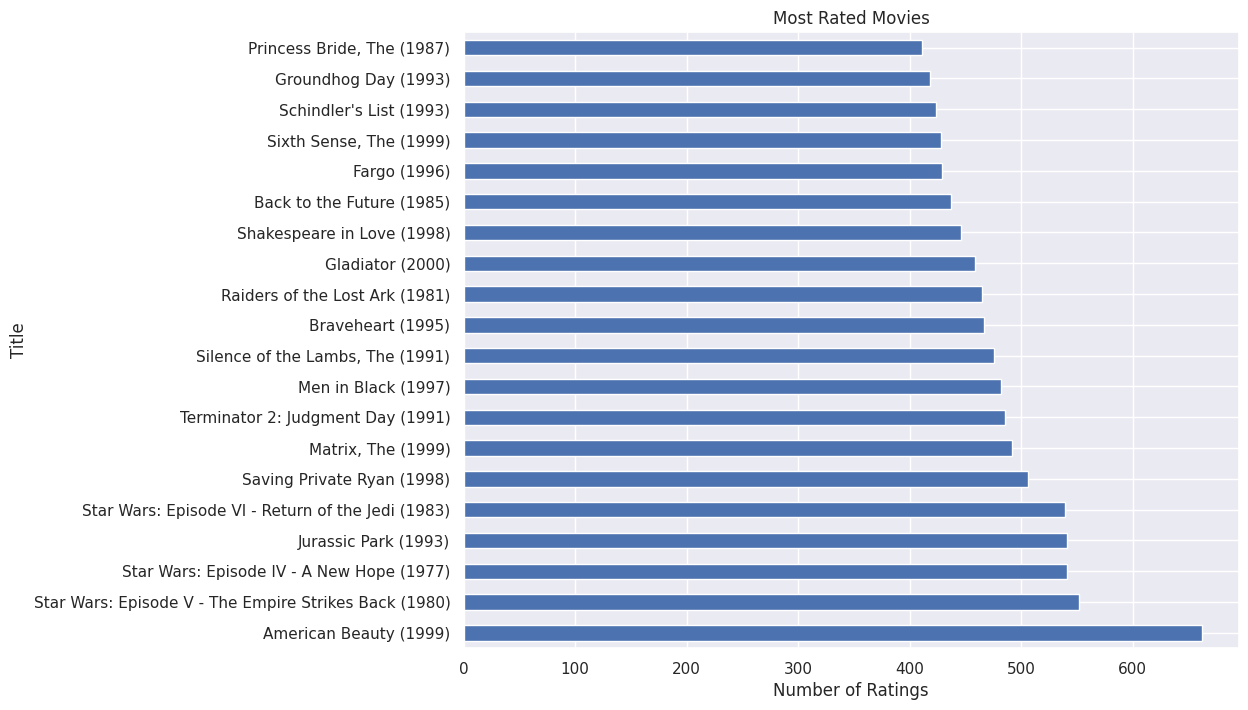

In [6]:
popular = movie_stats.sort_values("count", ascending=False).head(20)
popular["count"].plot(kind="barh", figsize=(10,8))
plt.title("Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.show()


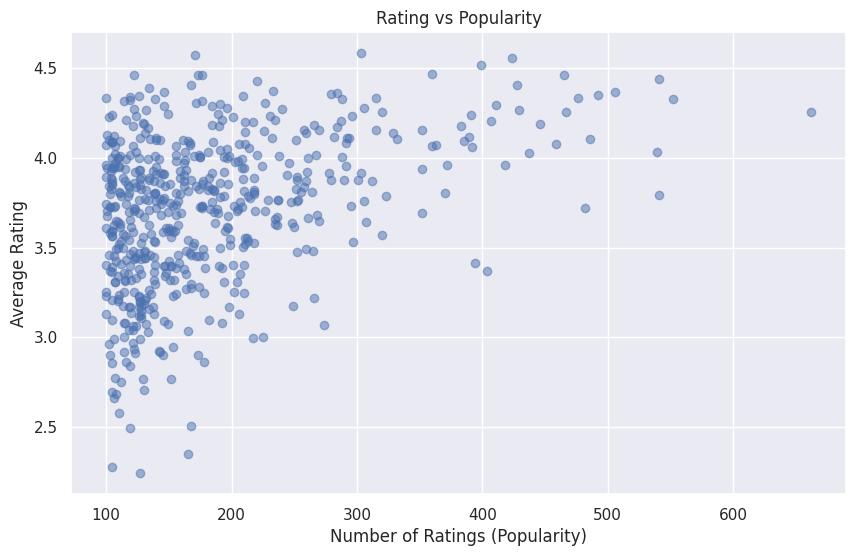

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(movie_stats['count'], movie_stats['avg_rating'], alpha=0.5)
plt.title("Rating vs Popularity")
plt.xlabel("Number of Ratings (Popularity)")
plt.ylabel("Average Rating")
plt.show()


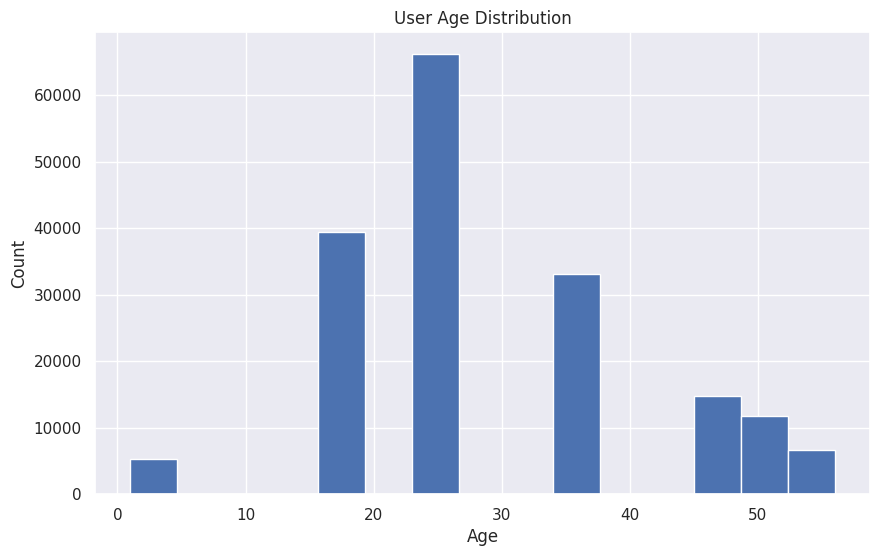

In [8]:
plt.hist(df["Age"], bins=15)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


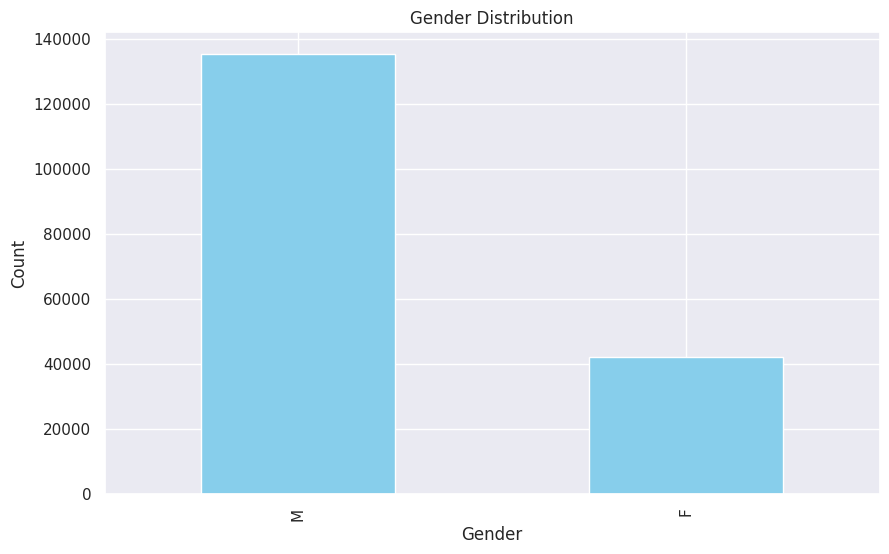

In [9]:
df["Gender"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


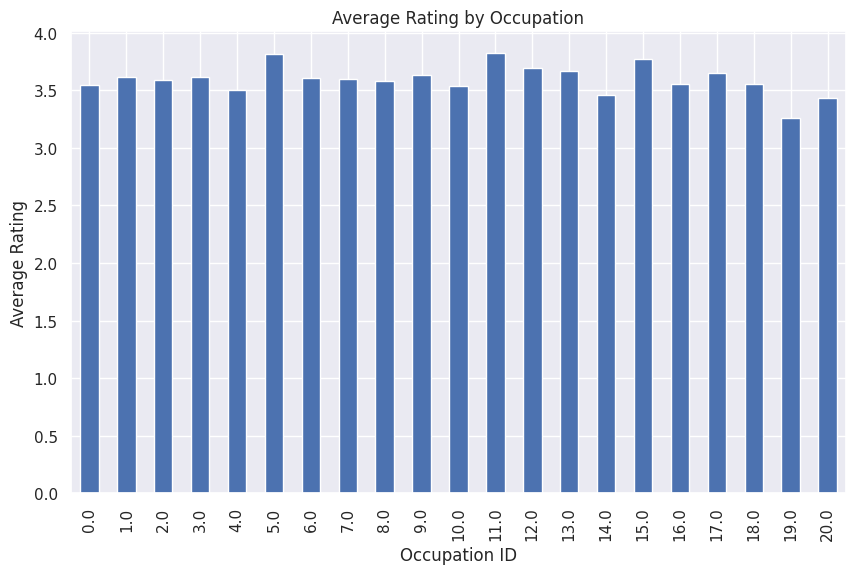

In [10]:
occ = df.groupby("Occupation")["Rating"].mean()

occ.plot(kind="bar", figsize=(10,6))
plt.title("Average Rating by Occupation")
plt.xlabel("Occupation ID")
plt.ylabel("Average Rating")
plt.show()


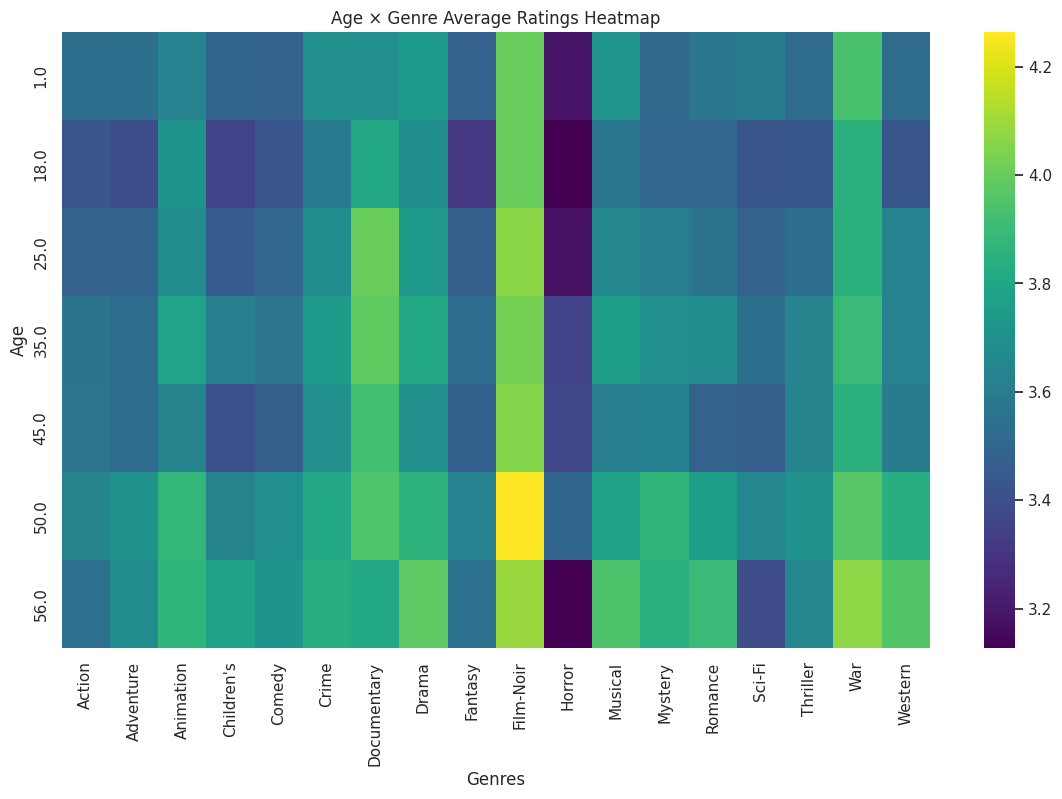

In [11]:
genre_matrix = genres.pivot_table(values="Rating", index="Age", columns="Genres", aggfunc="mean")
plt.figure(figsize=(14,8))
sns.heatmap(genre_matrix, cmap="viridis")
plt.title("Age × Genre Average Ratings Heatmap")
plt.show()


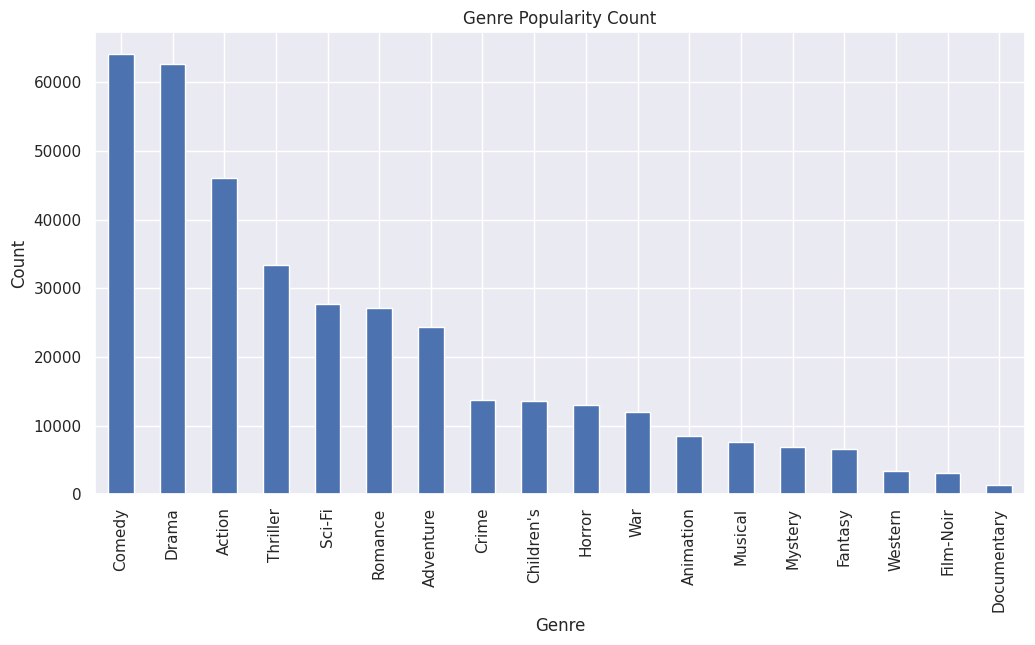

In [12]:
genres["Genres"].value_counts().plot(kind="bar", figsize=(12,6))
plt.title("Genre Popularity Count")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


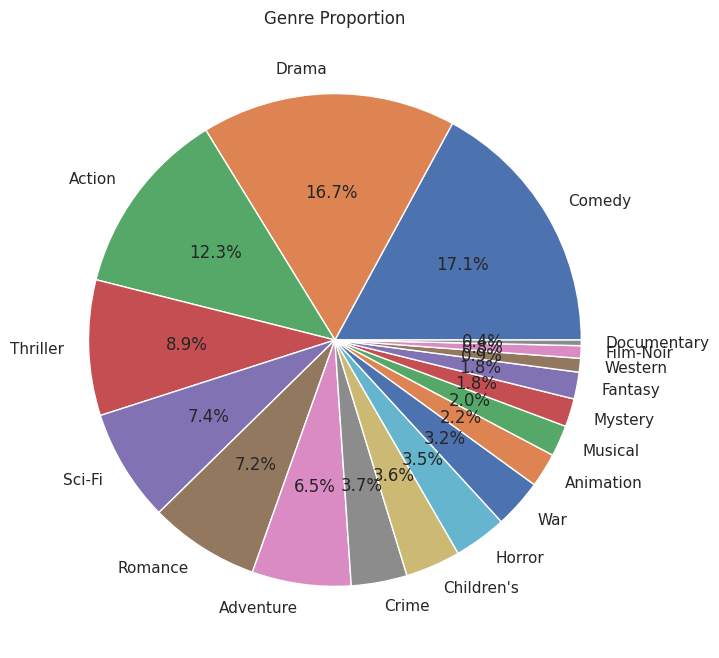

In [13]:
genres["Genres"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8,8))
plt.title("Genre Proportion")
plt.ylabel("")
plt.show()


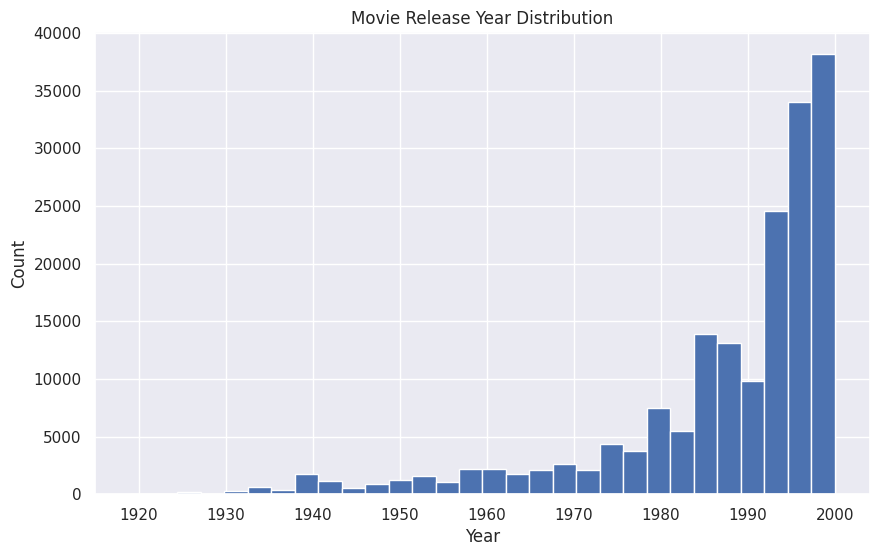

In [14]:
df["Year"] = df["Title"].str.extract(r"\((\d{4})\)").astype(float)

df["Year"].hist(bins=30, figsize=(10,6))
plt.title("Movie Release Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


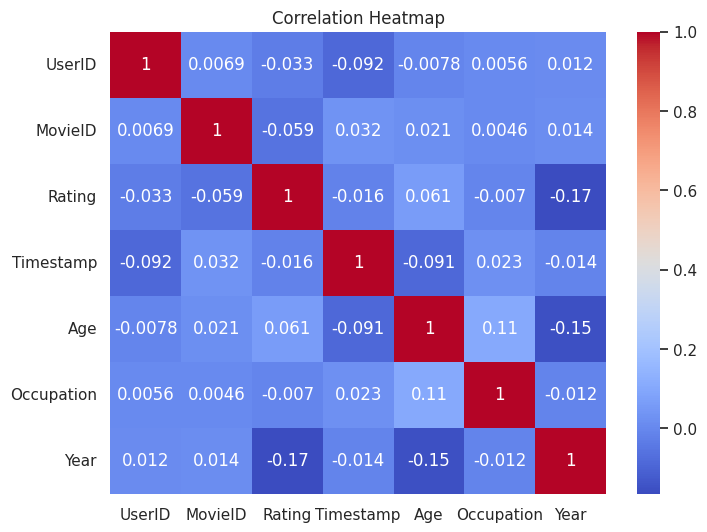

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

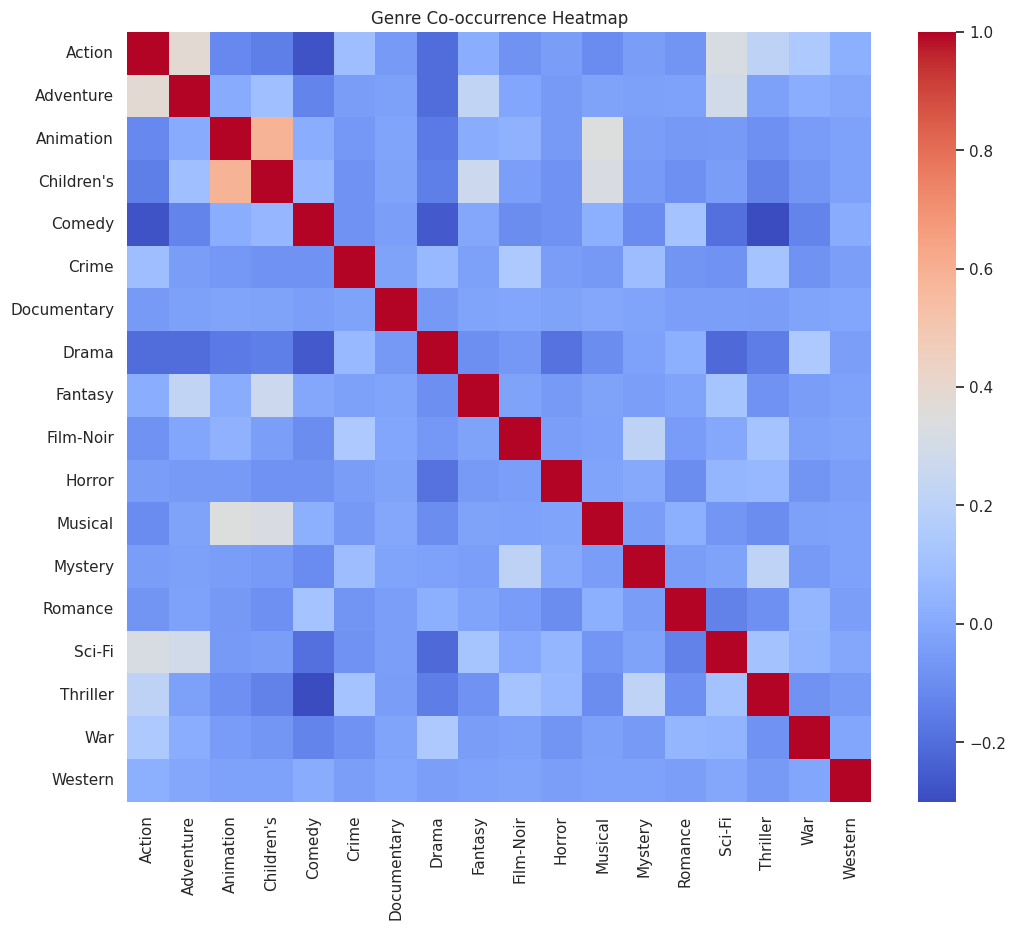

In [17]:
# genre list
all_genres = sorted(set("|".join(df["Genres"]).split("|")))

# create binary matrix
for g in all_genres:
    df[g] = df["Genres"].str.contains(g).astype(int)

corr = df[all_genres].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Genre Co-occurrence Heatmap")
plt.show()


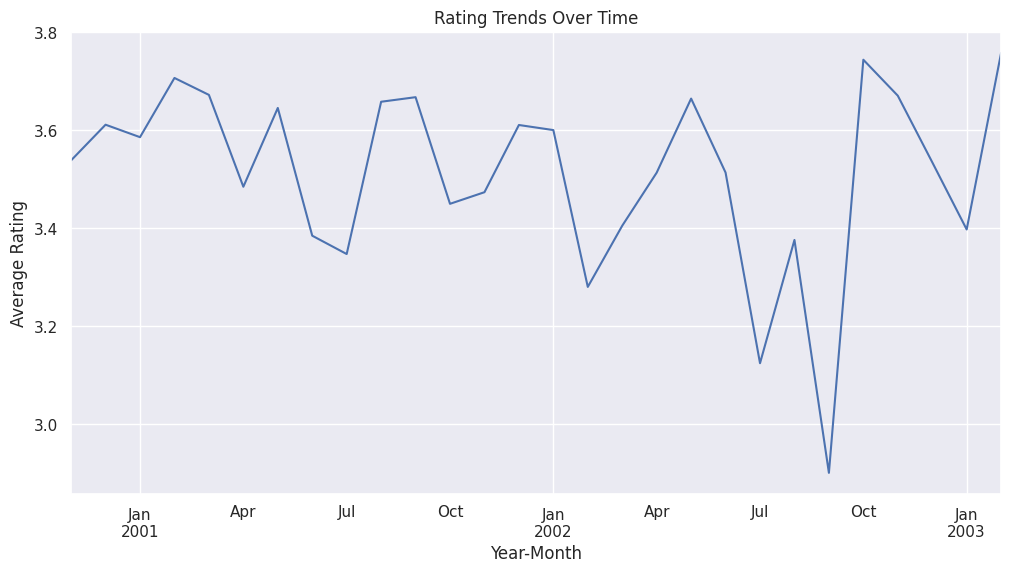

In [18]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")
df["Year_Month"] = df["Timestamp"].dt.to_period("M")

trend = df.groupby("Year_Month")["Rating"].mean()

trend.plot(figsize=(12,6))
plt.title("Rating Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Rating")
plt.show()


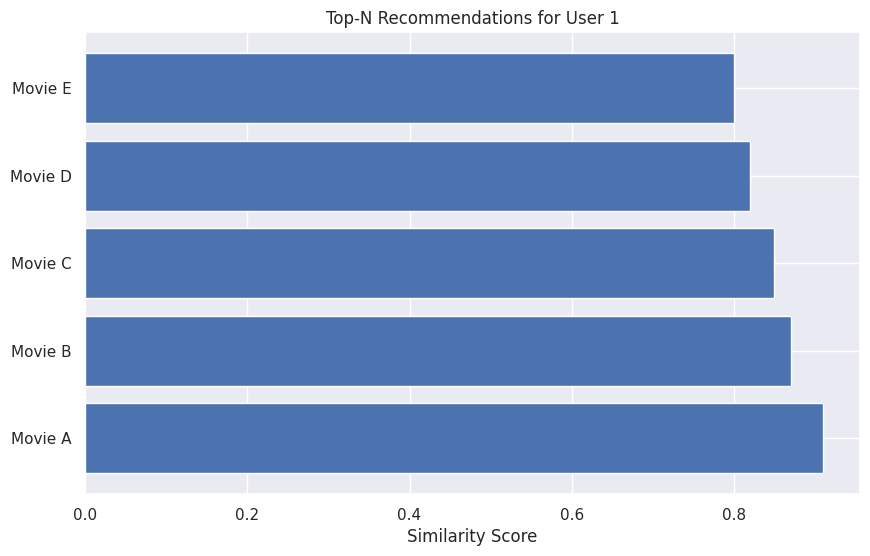

In [19]:
# sample dummy code
top_n = ["Movie A", "Movie B", "Movie C", "Movie D", "Movie E"]
scores = [0.91, 0.87, 0.85, 0.82, 0.80]

plt.barh(top_n, scores)
plt.title("Top-N Recommendations for User 1")
plt.xlabel("Similarity Score")
plt.show()


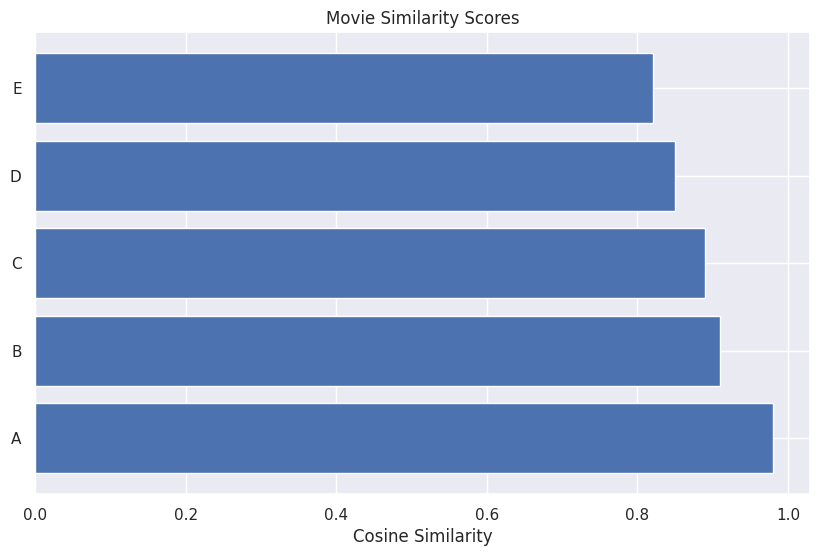

In [20]:
# replace similarity scores with your cosine similarity output
movies = ["A","B","C","D","E"]
sim = [0.98,0.91,0.89,0.85,0.82]

plt.barh(movies, sim)
plt.title("Movie Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.show()


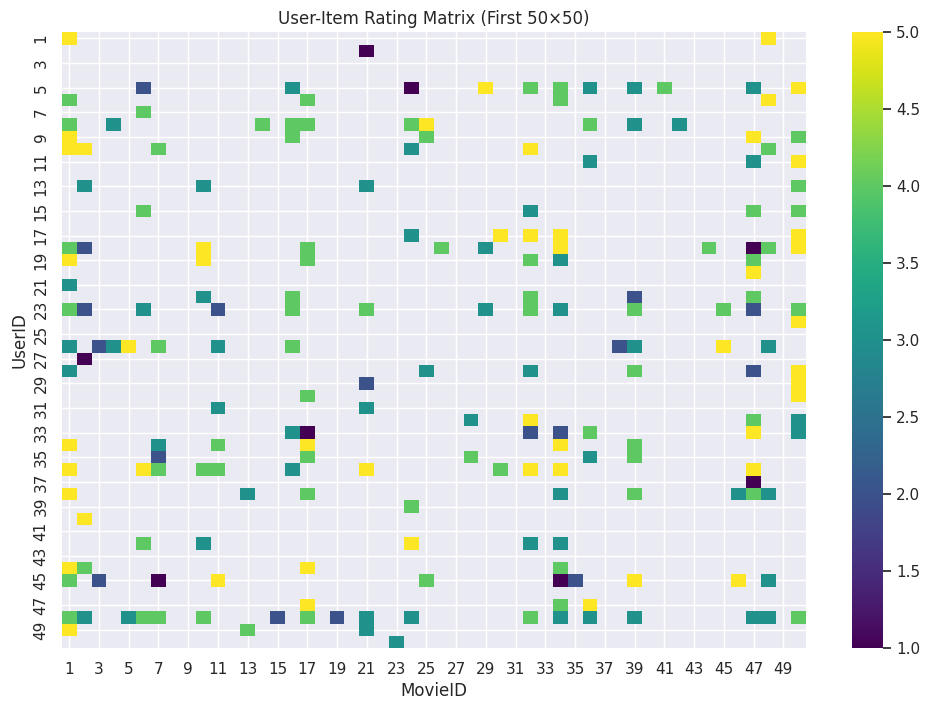

In [21]:
pivot = df.pivot_table(index="UserID", columns="MovieID", values="Rating")

plt.figure(figsize=(12,8))
sns.heatmap(pivot.iloc[:50, :50], cmap="viridis")
plt.title("User-Item Rating Matrix (First 50×50)")
plt.show()
